In [1]:
%run resources/surf_meas.py

Profiling:   0%|          | 0/214 [00:00<?, ?it/s]

Profiling:   0%|          | 0/164 [00:00<?, ?it/s]

Profiling:   0%|          | 0/177 [00:00<?, ?it/s]

Profiling:   0%|          | 0/159 [00:00<?, ?it/s]

In [22]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm

In [3]:
surfs = [surf5, surf7, surf8, surf9]
exps = [exp5, exp7, exp8, exp9]
data = zip(exps, surfs)

In [4]:
res_dfs = [pd.concat([exp.features, surf.meas_df], axis=1) for exp, surf in data]

In [5]:
res_dfs[0].drop([23,24], inplace=True)

In [50]:
for df in res_dfs:
    df.loc[:,['Form error', 'Runout']] = df.loc[:, ['Form error', 'Runout']]*1000

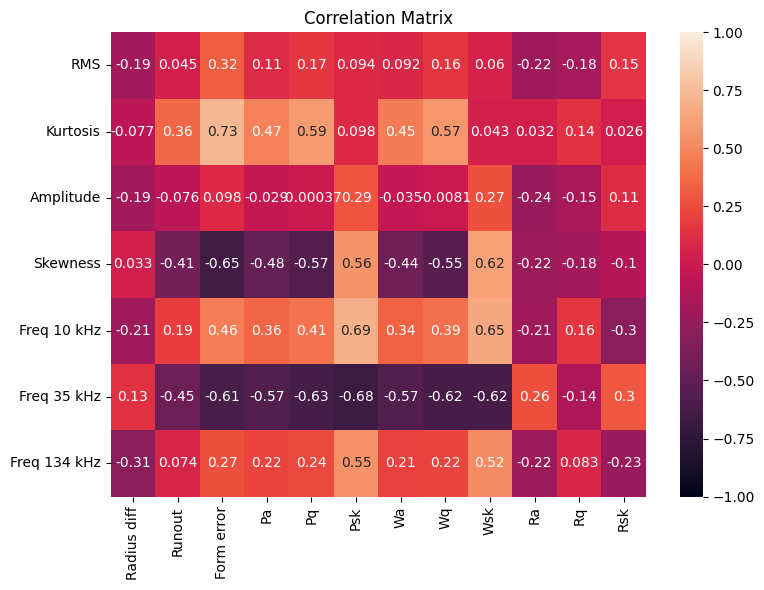

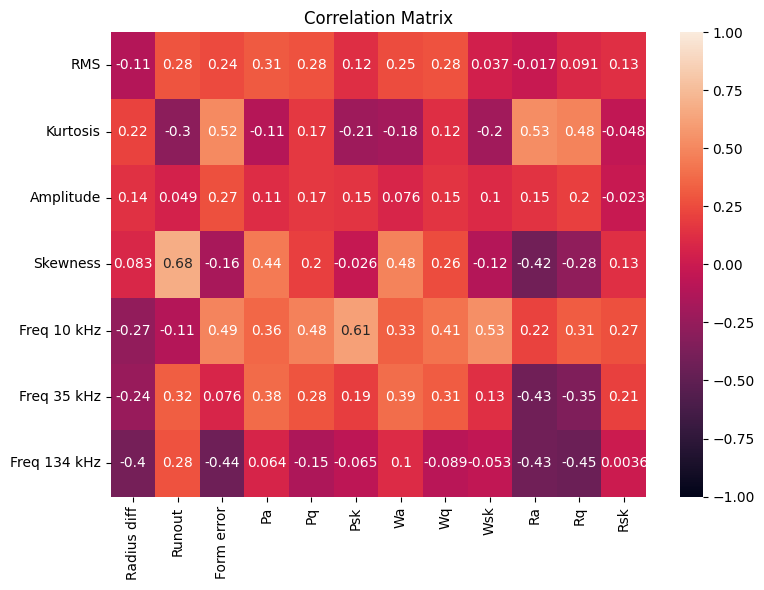

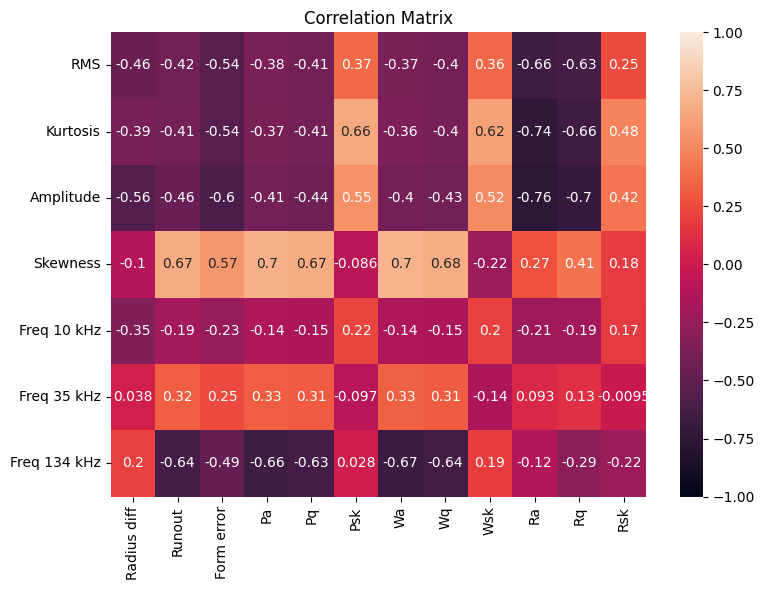

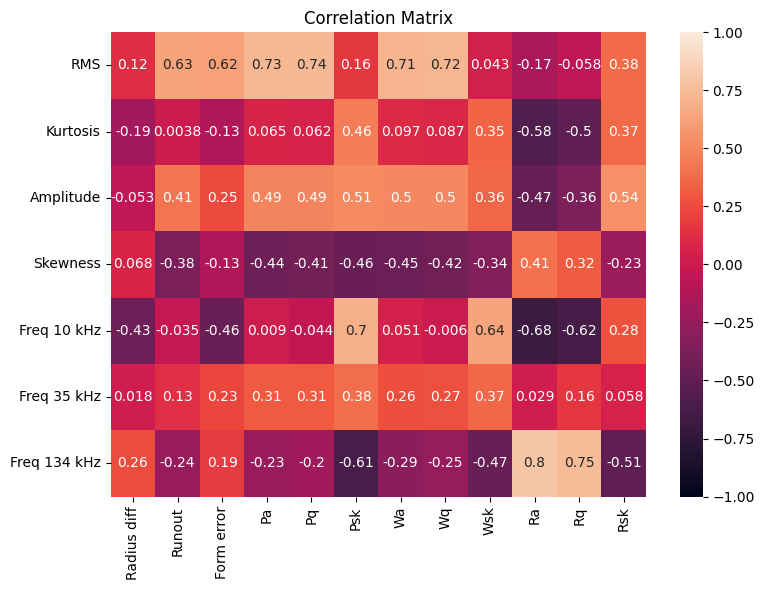

In [54]:
def corr_matrix(df: pd.DataFrame):
    cols = df.columns
    fig, ax = plt.subplots(figsize=(8, 6), dpi=100)
    corr = df.corr().iloc[:7, -12:]
    sns.heatmap(corr,
                ax=ax,
                annot=True,
                vmin=-1,
                vmax=1) \
        .set(title='Correlation Matrix')
    plt.tight_layout()
    # plt.show()
    return corr

for df in res_dfs: corr_matrix(df)

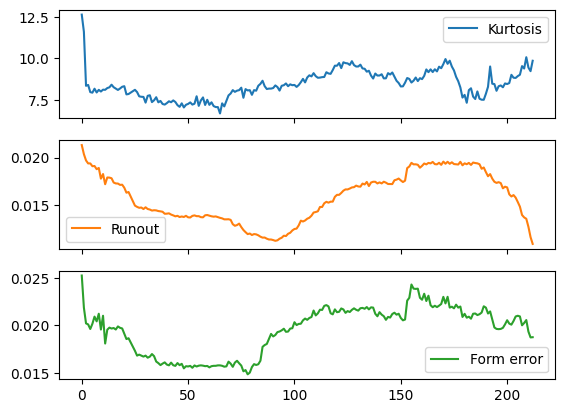

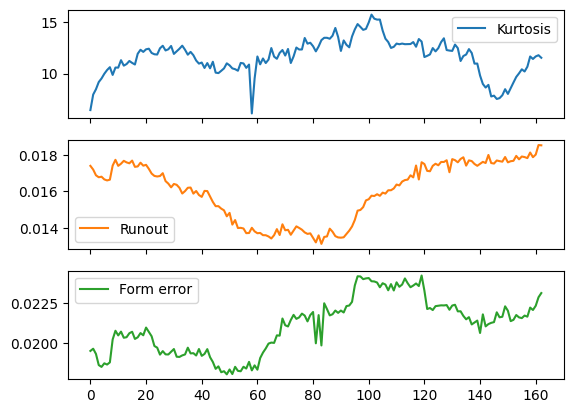

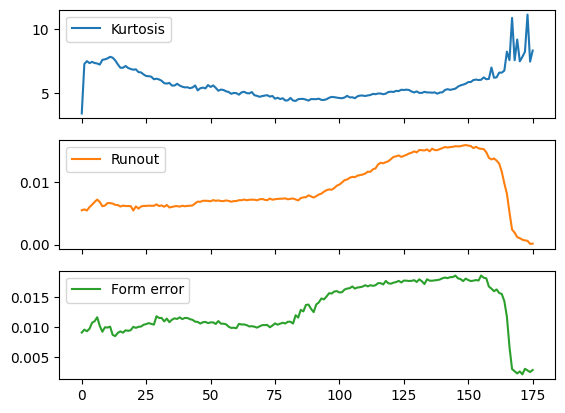

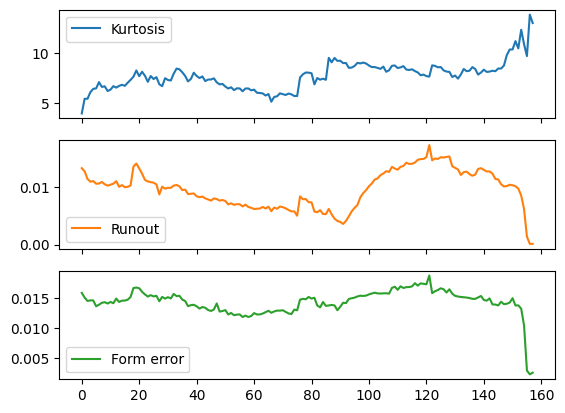

In [12]:
for df in res_dfs: df.plot(y=['Kurtosis', 'Runout', 'Form error'], subplots=True)

In [47]:
def plot_df(df, columns):

    cmap = cm.get_cmap('tab10', 10)
    line_styles = ["-", "--", "-.", ":"]

    fig, ax = plt.subplots(figsize=(8, 6), dpi=100)

    axes = [ax]
    handles = []

    for i, _ in enumerate(range(len(columns) - 1)):
        twin = ax.twinx()
        axes.append(twin)
        twin.spines.right.set_position(("axes", 1 + i/10))

    for i, col in enumerate(columns):
        ylabel = []
        if len(col) == 1:
            p, = axes[i].plot(df[col[0]], label = col[0], color = cmap(i)[:3])
            handles.append(p)
            ylabel.append(col[0])
        else:
            for j, sub_col in enumerate(col):
                p, = axes[i].plot(df[sub_col], label = sub_col, color = cmap(i)[:3], linestyle = line_styles[j])
                ylabel.append(sub_col)
                handles.append(p)
        axes[i].set_ylabel(', '.join(ylabel))

    ax.legend(handles = handles, frameon = True)

    plt.tight_layout()

    plt.show()

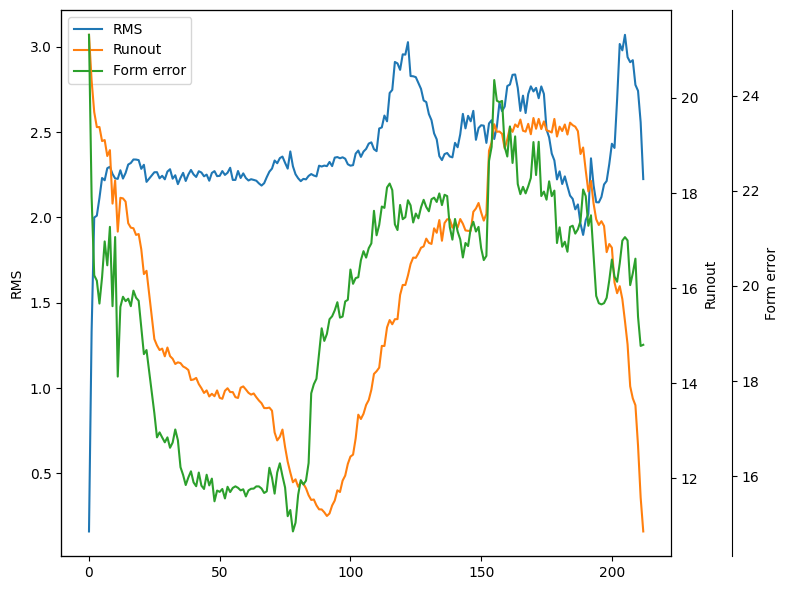

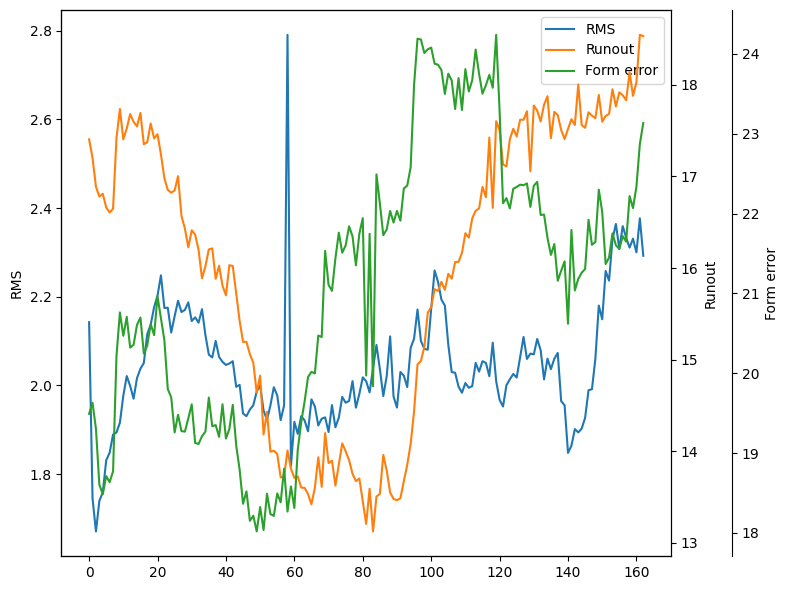

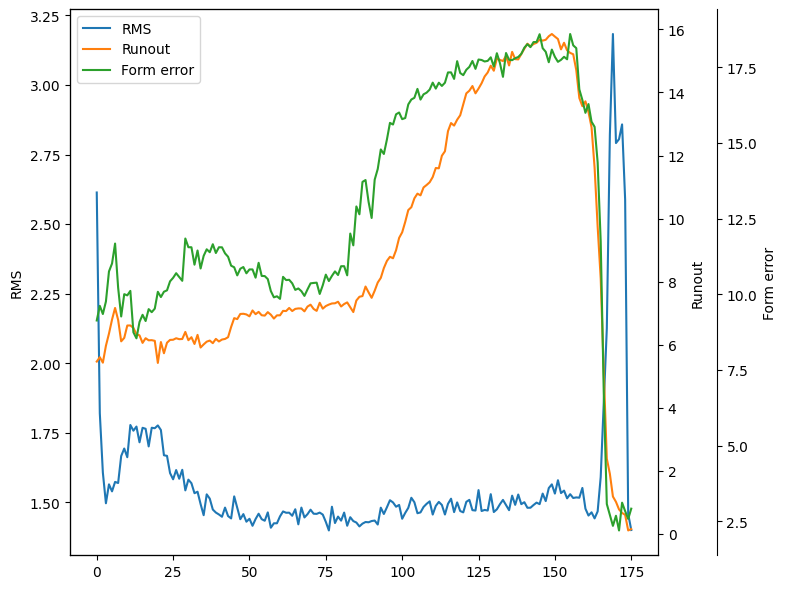

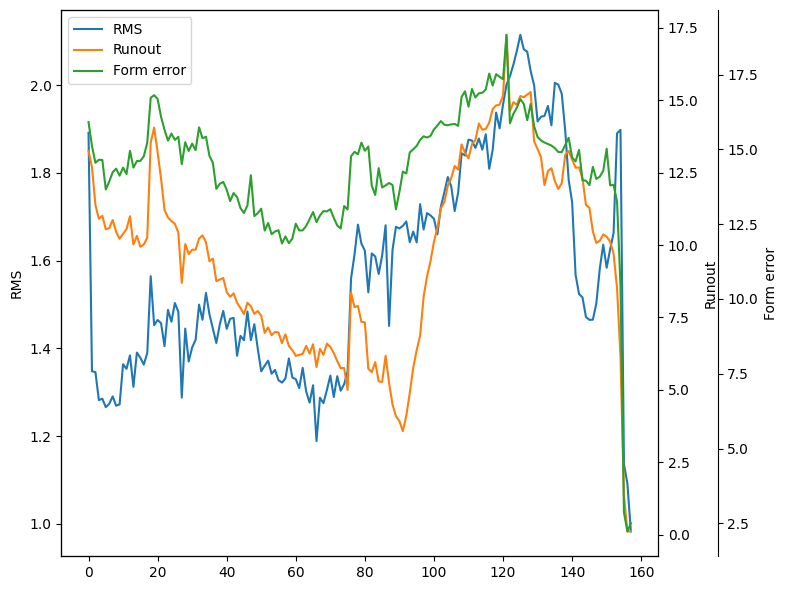

In [52]:
for df in res_dfs:
    plot_df(df, [['RMS'], ['Runout'], ['Form error']])